# Mercedez Benz Greener Manufacturing Extension

## Result From Previous Models

In [53]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["Linear Regression + label encoding", 0.50947, 0.51970])
x.add_row(["Linear Regression + label encoding + PCA", 0.50998, 0.51842])
x.add_row(["Linear regression + label encoding + interaction features", 0.50994, 0.51990])
x.add_row(["Linear Regression + label encoding + PCA + interaction features", 0.51050, 0.51850])

x.add_row(["RF + label encoding", 0.54949, 0.55709])
x.add_row(["RF + label encoding + PCA", 0.55032, 0.55684])
x.add_row(["RF + label encoding + interaction features", 0.55080, 0.55774])
x.add_row(["RF + label encoding + PCA + interaction features", 0.55148, 0.55912])

x.add_row(["XGB + label encoding", 0.53493, 0.54529])
x.add_row(["XGB + label encoding + PCA", 0.54654, 0.55458])
x.add_row(["XGB + label encoding + interaction features", 0.54345, 0.55114])
x.add_row(["XGB + label encoding + PCA + interaction features", 0.54178, 0.55019])

x.add_row(["ExtraTree + label encoding", 0.54968, 0.55519])
x.add_row(["ExtraTree + label encoding + PCA", 0.54881, 0.55200])
x.add_row(["ExtraTree + label encoding + interaction features", 0.54947, 0.55285])
x.add_row(["ExtraTree + label encoding + PCA + interaction features", 0.55045, 0.55298])

x.add_row(["Stacking + label encoding", 0.55060, 0.55746])
x.add_row(["Stacking + label encoding + PCA", 0.55125, 0.55757])
x.add_row(["Stacking + label encoding + interaction features", 0.55115, 0.55602])
x.add_row(["Stacking + label encoding + PCA + interaction features", 0.55227, 0.55578])


print(x)

+-----------------------------------------------------------------+---------------+--------------+
|                            Model Name                           | Private Score | Public Score |
+-----------------------------------------------------------------+---------------+--------------+
|                Linear Regression + label encoding               |    0.50947    |    0.5197    |
|             Linear Regression + label encoding + PCA            |    0.50998    |   0.51842    |
|    Linear regression + label encoding + interaction features    |    0.50994    |    0.5199    |
| Linear Regression + label encoding + PCA + interaction features |     0.5105    |    0.5185    |
|                       RF + label encoding                       |    0.54949    |   0.55709    |
|                    RF + label encoding + PCA                    |    0.55032    |   0.55684    |
|            RF + label encoding + interaction features           |     0.5508    |   0.55774    |
|         

I will choose top 2 models for further tries.

## Top 2 result from previous model

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Top 2 Model Name","Private Score", "Public Score"]

x.add_row(["RF + label encoding + PCA + interaction features", 0.55148, 0.55912])
x.add_row(["Stacking + label encoding + PCA + interaction features", 0.55227, 0.55578])


print(x)

+--------------------------------------------------------+---------------+--------------+
|                    Top 2 Model Name                    | Private Score | Public Score |
+--------------------------------------------------------+---------------+--------------+
|    RF + label encoding + PCA + interaction features    |    0.55148    |   0.55912    |
| Stacking + label encoding + PCA + interaction features |    0.55227    |   0.55578    |
+--------------------------------------------------------+---------------+--------------+


##### In this notebook, I tried to implement the approach used in the following discussion of kernel for the improvement of score:

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/34949
    
1. As per David, the author of this discussion, categorical features are featured engineered from other features.
    I am trying to use his hypothesis and will remove categorical feature and compare the model result with 
    previous approach.
    As per him, categorical features are feature engineered by rest of the features. So, removing them will show  improvement in our model.
    
2. Also, if I see feature importnaces from previous tree based models, the importance of categorical features are very low as compared to other features. So, this supports the David's hypothesis regarding the categorical features.

Let's implement the approach and compare our models.

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.preprocessing import normalize
import seaborn as sns
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV   
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from prettytable import PrettyTable
import pickle
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from xgboost import plot_importance
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from scipy import stats
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import cross_validate

## Loading Dataset

In [2]:
train_df = pd.read_csv("train.csv")
print("Number of datapoints: ", train_df.shape[0])
print("Number of features: ", train_df.shape[1])

Number of datapoints:  4209
Number of features:  378


Text(0.5, 1.0, 'X5 vs ID')

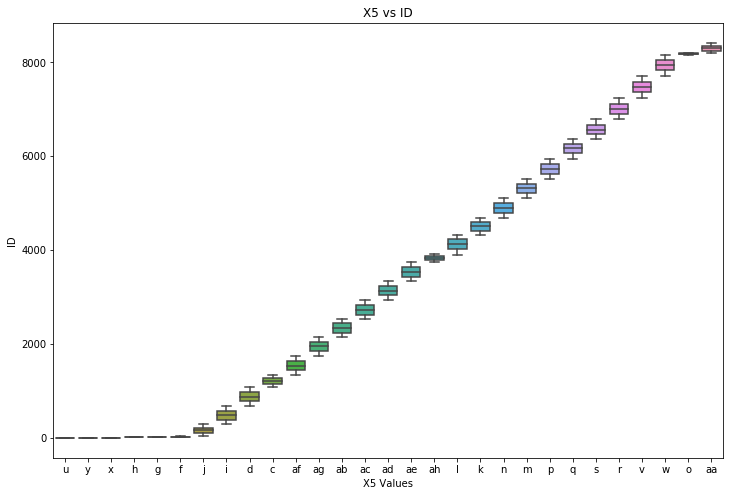

In [3]:
# https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/34949
plt.figure(figsize=(12,8))
sns.boxplot(y=train_df['ID'],x=train_df["X5"])
plt.xlabel("X5 Values")
plt.ylabel("ID")
plt.title("X5 vs ID")

1. As, we can see that X5 feature is the grouping of ID column, which is true according to david's hypothesis also
2. X4 feature has very low variance.
3. As, we can see that, using our previous tree based models, all the categorical features have very less feature importance as compared to other features.
4. So, in this model, we will remove the categorical features and then train the model.
5. We are taking threshold of target variable as 150

Let's try removing categorical features and then check the performance of model

In [4]:
train_df_modified = train_df[train_df["y"]<150]

# Preprocessing Data

### Preparing Traing Dataset

In [5]:
rem_cols = []
dups = list(train_df_modified.T.index[train_df_modified.T.duplicated(keep="first")].values)
rem_cols.extend(dups)
df_num = train_df_modified.loc[:,train_df_modified.dtypes==np.int64]

temp = []
for i in df_num.columns:
    if train_df_modified[i].var()==0:
        temp.append(i)
        
cat_feat = []
for i in train_df.columns:
    if train_df[i].dtypes == np.object:
        cat_feat.append(i)
        
rem_cols.extend(temp)
rem_cols.extend(cat_feat)
rem_cols = list(set(rem_cols))
print(train_df_modified.shape)
train_df_modified = train_df_modified.drop(rem_cols, axis=1)
print(train_df_modified.shape)

(4194, 378)
(4194, 312)


In [6]:
print("Number of removed features are: ",train_df.shape[1] - train_df_modified.shape[1])

Number of removed features are:  66


In [7]:
Y_train = train_df_modified["y"]
train_df_modified.drop(columns=["y"], axis=1, inplace=True)
X_train = train_df_modified

In [8]:
X_train_num = train_df_modified.loc[:,train_df_modified.dtypes==np.int64]
X_train_num.drop(columns=["ID"], inplace=True)

In [9]:
print(X_train_num.shape)
X_train_num.head()

(4194, 310)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing Test Dataset

In [10]:
test_df = pd.read_csv("test.csv")
print(test_df.shape)
test_df.head()

(4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
ID = test_df["ID"]
test_df.drop(columns=["ID"], inplace=True)
X_test = test_df

In [12]:
test_df_modified = test_df.drop(rem_cols, axis=1)
X_test_num = test_df_modified.loc[:,test_df.dtypes==np.int64]
print(test_df_modified.shape)
print(X_test_num.shape)

(4209, 310)
(4209, 310)


In [13]:
from scipy.sparse import hstack
print('Final feature matrix:')
X_train_le = X_train_num
print(X_train_le.shape)
X_test_le = X_test_num
print(X_test_le.shape)

Final feature matrix:
(4194, 310)
(4209, 310)


## Featurization

### Adding PCA Features

In [14]:
standardized_data_tr = StandardScaler().fit_transform(X_train_num)
standardized_data_te = StandardScaler().fit_transform(X_test_num)
print(standardized_data_tr.shape)
print(standardized_data_te.shape)

(4194, 310)
(4209, 310)


In [15]:
# https://blog.goodaudience.com/stacking-ml-algorithm-for-mercedes-benz-greener-manufacturing-competition-5600762186ae
# https://medium.com/@williamkoehrsen/capstone-project-mercedes-benz-greener-manufacturing-competition-4798153e2476
pca = PCA()
pca.n_components = 6
print("Before Transformation: ")
print(standardized_data_tr.shape)
print(standardized_data_te.shape)
pca_data_tr = pca.fit_transform(standardized_data_tr)
pca_data_te = pca.transform(standardized_data_te)
print("After Transformation:")
print(pca_data_tr.shape)
print(pca_data_te.shape)

Before Transformation: 
(4194, 310)
(4209, 310)
After Transformation:
(4194, 6)
(4209, 6)


In [16]:
train_df_modified_pca = train_df_modified.copy()
train_df_modified_pca["PCA_1"] = pca_data_tr[:,0]
train_df_modified_pca["PCA_2"] = pca_data_tr[:,1]
train_df_modified_pca["PCA_3"] = pca_data_tr[:,2]
train_df_modified_pca["PCA_4"] = pca_data_tr[:,3]
train_df_modified_pca["PCA_5"] = pca_data_tr[:,4]
train_df_modified_pca["PCA_6"] = pca_data_tr[:,5]
test_df_modified_pca = test_df_modified.copy()
test_df_modified_pca["PCA_1"] = pca_data_te[:,0]
test_df_modified_pca["PCA_2"] = pca_data_te[:,1]
test_df_modified_pca["PCA_3"] = pca_data_te[:,2]
test_df_modified_pca["PCA_4"] = pca_data_te[:,3]
test_df_modified_pca["PCA_5"] = pca_data_te[:,4]
test_df_modified_pca["PCA_6"] = pca_data_te[:,5]

### Finalizing PCA Features and combining it

In [17]:
print('PCA matrix:')
X_train_le_PCA = hstack((X_train_le,pca_data_tr)).tocsr()
print(X_train_le_PCA.shape)
X_test_le_PCA = hstack((X_test_le,pca_data_te)).tocsr()
print(X_test_le_PCA.shape)

PCA matrix:
(4194, 316)
(4209, 316)


### Featurizing 2-way and 3-way feature interaction

In [18]:
# https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700
# https://www.kaggle.com/anubhav3377/17th-place-solution-private-score-0-55378
# taking X314 and X315
train_df_modified["X314_plus_X315"] = train_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
test_df_modified['X314_plus_X315'] = test_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
train_df_modified_pca['X314_plus_X315'] = train_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
test_df_modified_pca['X314_plus_X315'] = test_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
# taking X314, X315 and X118
train_df_modified['X118_plus_X314_plus_X315'] = train_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
test_df_modified['X118_plus_X314_plus_X315'] = test_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
train_df_modified_pca['X118_plus_X314_plus_X315'] = train_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
test_df_modified_pca['X118_plus_X314_plus_X315'] = test_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
# taking X118 and X263
train_df_modified['X118_plus_X263'] = train_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
test_df_modified['X118_plus_X263'] = test_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
train_df_modified_pca['X118_plus_X263'] = train_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
test_df_modified_pca['X118_plus_X263'] = test_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
# taking X29, X118 and X263
train_df_modified['X29_plus_X118_plus_X263'] = train_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)
test_df_modified['X29_plus_X118_plus_X263'] = test_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)
train_df_modified_pca['X29_plus_X118_plus_X263'] = train_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)
test_df_modified_pca['X29_plus_X118_plus_X263'] = test_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)

### Finalizing interaction features

In [19]:
print('interaction Matrix:')
X_train_le_corr = hstack((X_train_le,train_df_modified['X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X263'].values.reshape(-1,1),train_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_train_le_corr.shape)
X_test_le_corr = hstack((X_test_le,test_df_modified['X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X263'].values.reshape(-1,1),test_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_test_le_corr.shape)

interaction Matrix:
(4194, 314)
(4209, 314)


### Adding interaction features to PCA features and Train/Test Data

In [20]:
print('interaction + PCA Matrix:')
X_train_le_PCA_corr = hstack((X_train_le_PCA,train_df_modified['X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X263'].values.reshape(-1,1),train_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_train_le_PCA_corr.shape)
X_test_le_PCA_corr = hstack((X_test_le_PCA,test_df_modified['X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X263'].values.reshape(-1,1),test_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_test_le_PCA_corr.shape)

interaction + PCA Matrix:
(4194, 320)
(4209, 320)


### featurized dataset:

##### Label Encoding + PCA +  Interaction Features:
1. X_train_le_PCA_corr
2. X_test_le_PCA_corr

# Modelling

## RandomForestRegressor

### Label Encoding + PCA + Interaction Features

In [21]:
%%time
neigh=RandomForestRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[100,150,200,300,350,500],
             'max_depth':[1,2,3,5,7,10],
             'min_samples_split':[2,3,4,5,6,7,8,9,10],
             'max_features': [0.95],
             'min_samples_leaf': [1, 2,3,4,5,6,7,8,9],
             'random_state':[30,42]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


CPU times: user 4.69 s, sys: 177 ms, total: 4.87 s
Wall time: 3min 45s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [22]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_r2 = results["mean_train_score"]
cv_r2 = results["mean_test_score"]

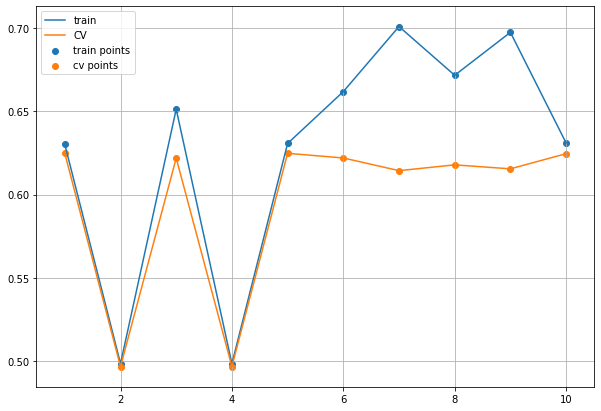

0.6247685899553609


In [23]:
candidates = list(range(1,11))
plt.figure(figsize=(10, 7))
plt.plot(candidates, train_r2, label="train")
plt.plot(candidates, cv_r2, label="CV")
plt.scatter(candidates, train_r2, label="train points")
plt.scatter(candidates, cv_r2, label="cv points")
plt.legend()
plt.grid()
plt.show()
print(clf.best_score_)

In [24]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [25]:
model_rf_le_PCA_corr = clf.best_estimator_
model_rf_le_PCA_corr.fit(X_train_le_PCA_corr, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [26]:
pred_test_rf = model_rf_le_PCA_corr.predict(X_test_le_PCA_corr)

In [27]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = pred_test_rf
submission_rf.to_csv("submission_rf_le_PCA_corr.csv",index=False)

### Summary of Random Forest Models

In [28]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["RF + PCA + interaction features", 0.54897, 0.55453])


print(x)

+---------------------------------+---------------+--------------+
|            Model Name           | Private Score | Public Score |
+---------------------------------+---------------+--------------+
| RF + PCA + interaction features |    0.54897    |   0.55453    |
+---------------------------------+---------------+--------------+


1. This model was previously our 2nd best model. 
2. As we can see that, score is lower than previous results. So, there is no improvement in this.
3. Let's try our best model now which is stacking model (Random Forest + XGBoost + ExtraTree)

## XGBRegressor

In [29]:
from xgboost import XGBRegressor

### Label Encoding + PCA + interaction features

In [30]:
%%time
neigh=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
             'n_estimators':[100,150,200,500],
             'max_depth':[2,3,5,10],
             'colsample_bytree':[0.1,0.5,0.7,1],
             'subsample':[0.2,0.3,0.5,1],
             'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
             'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


[15:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 4.5 s, sys: 72.7 ms, total: 4.57 s
Wall time: 1min 5s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alp...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                               

In [31]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

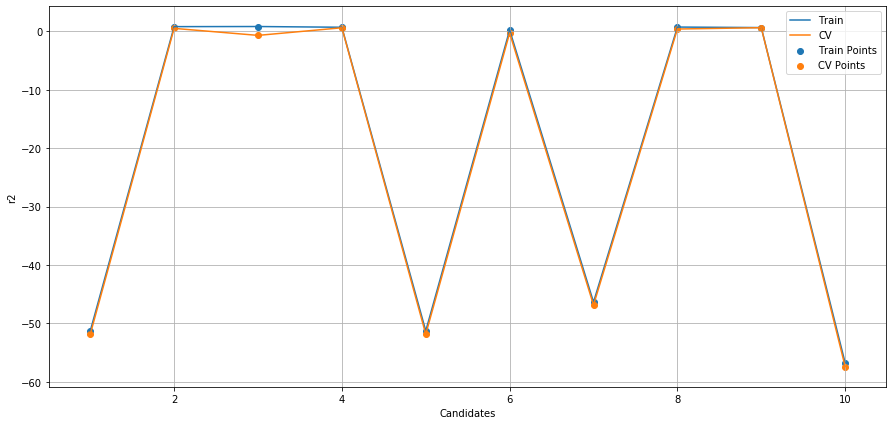

The Best Score 0.6243421311170492


In [32]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [33]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.001,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [34]:
model_xgb_le_pca_corr = clf.best_estimator_
model_xgb_le_pca_corr.fit(X_train_le_PCA_corr, Y_train)

[15:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.001,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [35]:
pred_test_xgb = model_xgb_le_pca_corr.predict(X_test_le_PCA_corr)

In [36]:
submission_xgb_le_pca_corr = pd.DataFrame()
submission_xgb_le_pca_corr["ID"] = ID
submission_xgb_le_pca_corr["y"] = pred_test_xgb

In [37]:
submission_xgb_le_pca_corr.to_csv("submission_xgb_le_pca_corr.csv",index=False)

### Summary of XGBRegressor Models

In [38]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["XGB + PCA + interaction features", 0.54653, 0.54980])


print(x)

+----------------------------------+---------------+--------------+
|            Model Name            | Private Score | Public Score |
+----------------------------------+---------------+--------------+
| XGB + PCA + interaction features |    0.54653    |    0.5498    |
+----------------------------------+---------------+--------------+


## ExtraTreeRegressor

### Label Encoder + PCA + Interaction Features

In [39]:
%%time
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,350,400,500],
             'max_depth':[2,3,4,5,7,8,10],
             'min_samples_split':[2,3,4,5,6,7,8,10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,8,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


CPU times: user 15.2 s, sys: 173 ms, total: 15.3 s
Wall time: 1min 58s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,...
                   para

In [40]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

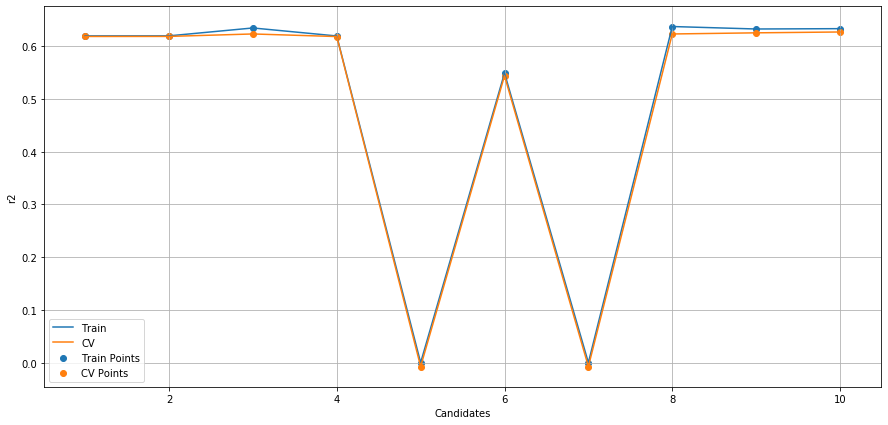

The Best Score 0.6267566868843197


In [41]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [42]:
clf.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.01,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=350, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [43]:
model_xt_le_pca_corr = clf.best_estimator_
model_xt_le_pca_corr.fit(X_train_le_PCA_corr, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.01,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=350, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [44]:
pred_test_xt = model_xt_le_pca_corr.predict(X_test_le_PCA_corr)

In [45]:
submission_xt_le_pca_corr = pd.DataFrame()
submission_xt_le_pca_corr["ID"] = ID
submission_xt_le_pca_corr["y"] = pred_test_xt

In [46]:
submission_xt_le_pca_corr.to_csv("submission_xt_le_pca_corr.csv",index=False)

### Summary of ExtraTreeRegressor Model

In [47]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["ExtraTree + PCA + interaction features", 0.54879, 0.55077])


print(x)

+----------------------------------------+---------------+--------------+
|               Model Name               | Private Score | Public Score |
+----------------------------------------+---------------+--------------+
| ExtraTree + PCA + interaction features |    0.54879    |   0.55077    |
+----------------------------------------+---------------+--------------+


## Stacking Models

### Label Encoding + PCA + Interaction Features

In [48]:
ridge = Ridge(random_state=42, fit_intercept=False, alpha=0)
stack_le_pca_corr = StackingCVRegressor(regressors=(model_rf_le_PCA_corr, model_xgb_le_pca_corr, model_xt_le_pca_corr),
                           meta_regressor=ridge, 
                           use_features_in_secondary = False, refit=True, cv=5)

cv_score=cross_val_score(stack_le_pca_corr,X_train_le_PCA_corr,Y_train,scoring='r2',cv= 5,verbose=5,n_jobs=-1)
print('Mean Score:',cv_score.mean())
print('Standard Deviation:',cv_score.std())
stack_le_pca_corr.fit(X_train_le_PCA_corr,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


Mean Score: 0.622920786933874
Standard Deviation: 0.03043990451675756
[15:52:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=0, copy_X=True,
                                         fit_intercept=False, max_iter=None,
                                         normalize=False, random_state=42,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=3,
                                                      max_features=0.95,
                                                      max_leaf_nodes=None...
                                                    max_depth=4,
                                                    max_features=0.95,
                   

In [49]:
pred_stack_label = stack_le_pca_corr.predict(X_test_le_PCA_corr)

In [50]:
submission_stack = pd.DataFrame()
submission_stack["ID"] = ID
submission_stack["y"] = pred_stack_label 
submission_stack.to_csv("submission_stack_le_pca_corr.csv", index=False)

In [51]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["Stacking + PCA + interaction features", 0.54891, 0.54959])

print(x)

+---------------------------------------+---------------+--------------+
|               Model Name              | Private Score | Public Score |
+---------------------------------------+---------------+--------------+
| Stacking + PCA + interaction features |    0.54891    |   0.54959    |
+---------------------------------------+---------------+--------------+


Now, let's compare the results in conclusion section

# Conclusion

In [56]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score ", "Public Score "]

x.add_row(["RF + label encoding + PCA + interaction features", 0.55148, 0.55912])
x.add_row(["Stacking + label encoding + PCA + interaction features", 0.55227, 0.55578])
x.add_row(["RF + PCA + interaction features (without categorical features)", 0.54897, 0.55453])
x.add_row(["Stacking + PCA + interaction features (without categorical features)", 0.54891, 0.54959])


print(x)

+----------------------------------------------------------------------+----------------+---------------+
|                              Model Name                              | Private Score  | Public Score  |
+----------------------------------------------------------------------+----------------+---------------+
|           RF + label encoding + PCA + interaction features           |    0.55148     |    0.55912    |
|        Stacking + label encoding + PCA + interaction features        |    0.55227     |    0.55578    |
|    RF + PCA + interaction features (without categorical features)    |    0.54897     |    0.55453    |
| Stacking + PCA + interaction features (without categorical features) |    0.54891     |    0.54959    |
+----------------------------------------------------------------------+----------------+---------------+


As, we can see that, both private and public scores of models (without categorical features) are
lower than that of with categorical features.
So, this results proved our hypothesis wrong.
### The best model is still (Stacking + label encoding + PCA + interaction features) with private score of 0.55227